In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
data = pd.read_csv('Medical-Appointments.csv')

In [4]:
data.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [10]:
X1 = data[['SMS_received', 'PatientId']].groupby('SMS_received').count()
X1

,PatientId
SMS_received,
0,75045
1,35482


In [11]:
X2 = pd.crosstab(data['SMS_received'], data['No-show'])
X2.columns = ['Show', 'No-show']
X2

,Show,No-show
SMS_received,,
0,62510,12535
1,25698,9784


In [13]:
X = X1.merge(X2, left_index=True, right_index=True)

In [14]:
X

,PatientId,Show,No-show
SMS_received,,,
0,75045,62510,12535
1,35482,25698,9784


In [15]:
X['Show'] = X['Show']/X['PatientId']
X['No-show'] = X['No-show']/X['PatientId']
X

,PatientId,Show,No-show
SMS_received,,,
0,75045,0.832967,0.167033
1,35482,0.724255,0.275745


In [21]:
sms_no_show = data.loc[(data['SMS_received'] == 1) & (data['No-show'] == 'Yes')]

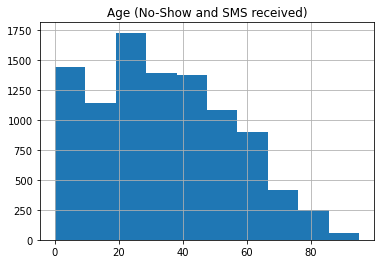

In [24]:
ax = sms_no_show['Age'].hist()
ignore = ax.set_title('Age (No-Show and SMS received)')

In [26]:
sms_no_show[['AppointmentID', 'Gender']].groupby('Gender').count()

,AppointmentID
Gender,
F,6720
M,3064


<AxesSubplot:xlabel='Age'>

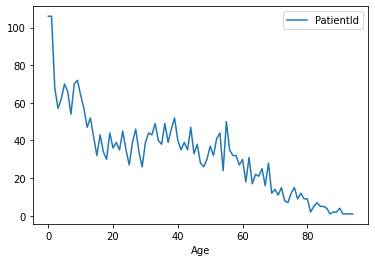

In [35]:
sms_no_show.loc[sms_no_show['Gender']=='M'][['PatientId', 'Age']].groupby('Age').count().plot()

<AxesSubplot:xlabel='Age'>

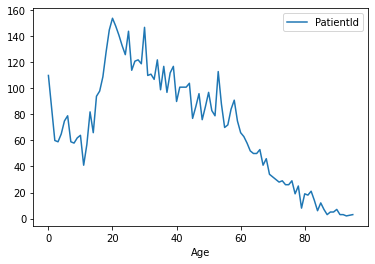

In [36]:
sms_no_show.loc[sms_no_show['Gender']=='F'][['PatientId', 'Age']].groupby('Age').count().plot()